In [109]:
import numpy as np
import matplotlib.pyplot as plt

file = open("data0.txt")

labels = []
x = []
y = []
for line in file:
    if(len(labels) == 0):
        labels = line.split(',')
        continue
    line_arr = line.split(' ')
    x.append(line_arr[:2:])
    y.append(line_arr[2::][0][0])

rand_ind = np.array(range(0, 303))
np.random.shuffle(rand_ind)

ind_test = rand_ind[200::]
ind_train = rand_ind[:200:]

x = [list(map(float,i)) for i in x]
y = list(map(float, y))
x = np.array(x)
y = np.array(y)
print(len(y))

47


In [110]:
def multiclass_perceptron_label(w, b, x):
    label = [0]*len(w)
    for i in range(len(w)):
        label[i] = np.dot(w[i], x) + b[i]
    return np.argmax(label)

            
def multiclass_perceptron_classifier(x,y):

    w = [[0,0]]*4
    b = [0]*4
    rand_inds = np.arange(0, len(x))
    np.random.shuffle(rand_inds)
    num_errors = -1
    k = 0
    
    while num_errors != 0:
        num_errors = 0
        
        np.random.shuffle(rand_inds)
        for i in rand_inds:
            l = multiclass_perceptron_label(w, b, x[i])
            if l != y[i]:
                cor= int(y[i])
                
                w[cor] = [a + b for a, b in zip(w[cor], x[i])]
                b[cor] = b[cor] + 1

                w[l] = [a - b for a, b in zip(w[l], x[i])]
                b[l] = b[l] - 1
                num_errors += 1
                k += 1

    return w, b, k

[[3.0, -4.0], [-41.0, 34.0], [29.0, -35.0], [9.0, 5.0]] [57, -15, -10, -32]
47 47 47


ValueError: 'po^' is not a valid format string (two marker symbols)

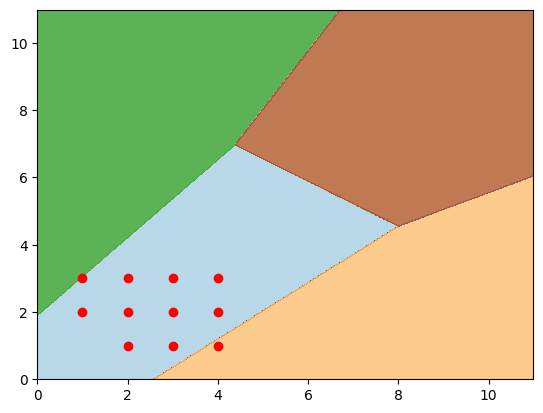

In [132]:
W,b,k = multiclass_perceptron_classifier(x,y)
print(w, b)

# Function to predict class labels
def predict(X):
    x_arr = np.array(X)
    w_arr = np.array(w)
    scores = np.dot(X, w_arr.T) + b
    return np.argmax(scores, axis=1)

# Create a meshgrid for plotting decision regions
h = 0.01
x_min, x_max = 0, 11
y_min, y_max = 0, 11
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict labels for meshgrid points
Z = predict(meshgrid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
print(len(x[:,0]),len(x[:,1]), len(y))
# Scatter plot of data points
# Assuming you have data X and labels y
# Replace the following with your actual data
plt.plot(x[(y==0),0], x[(y==0),1], 'ro')
plt.plot(x[(y==1),0], x[(y==1),1], 'po^')
plt.plot(x[(y==1),0], x[(y==1),1], 'oo')
plt.plot(x[(y==1),0], x[(y==1),1], 'bo')
print(np.max(x))

plt.title("Multiclass Perceptron Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()